# Ride Share Code & Analysis

In [2]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import numpy as np

Ride share data CSV 

In [3]:
df = pd.read_csv(r"C:\RideShare_Data\rideshare_data.csv")

In [5]:
df.head()

,ORDER_ID,USER_ID,ITEM_ID,MERCHANT_NAME,ORDER_DATE,ORDER_TOTAL,DESCRIPTION,TAXI_TYPE,TAXI_RIDE_DISTANCE_UNIT,TAXI_RIDE_DISTANCE,TAXI_RIDE_TIME,TAXI_FARE_TYPE,TAXI_PICKUP_CITY,TAXI_PICKUP_STATE
0,594d35b6-a15c-3446-a271-99dc0e4f8595,c913e80c-551a-3311-aa62-826d2ac585a9,69211280-faaa-3ba1-a046-a9c1820ade87,Uber,2019-09-28,13.87,Fare for Uber,UberX,mi,7.68,00:19:00,NaN,San Diego,CA
1,efd72404-b02f-3b4b-b60e-31143e398461,31f6474b-49d0-3ec6-9d61-0b1e12af9882,c9619d67-f961-36b9-ac83-d3ead01e00eb,Lyft,2020-10-22,8.60,Fare for Lyft,NaN,mi,2.91,00:08:09,NaN,Nashville-Davidson metropolitan government (ba...,TN
2,f07bb248-5f41-3b99-9529-839730a91df4,bd9b6bca-fabc-33a0-9088-8d6c137c4d97,12001593-310d-3d61-b3a3-9bf0ba2af3bd,Uber,2020-10-29,10.44,Fare for Uber,UberX,miles,1.36,00:05:00,NaN,Patton Township,PA
3,04f7a692-8d49-37d1-b860-99694c06c642,7f949e51-575f-3ea3-9ab3-409faec2fe65,b6f56fc8-d830-37c5-b60b-c3acbca2d9e9,Lyft,2019-08-20,0.00,Fare for Lyft,NaN,mi,4.06,00:26:45,NaN,Seattle,WA
4,4595ec34-4af1-3743-8b01-e437a7212091,bce7f327-0b99-358f-a63a-d7774c3208ab,e1c11bd3-0982-3589-b79a-6efe86e6f9c9,Lyft,2020-03-17,11.72,Fare for Lyft,Lyft Prebook,mi,8.45,00:13:01,NaN,Wyoming,MI


In [6]:
df.shape

(21078051, 14)

## Data cleaning and preprocessing

Dropping the following columns:

1. Order ID and User ID: Not needed as Item ID can act as the unique identifier
2. Description: Not relevant to task in hand
3. Taxi type, Taxi fare type: Not relevant to task in hand
4. Taxi Pickup City dropped

In [4]:
df = df.drop(['ORDER_ID','USER_ID'],axis=1)

In [5]:
df = df.drop(['DESCRIPTION','TAXI_TYPE','TAXI_FARE_TYPE'],axis=1)

In [6]:
df = df.drop(['TAXI_PICKUP_CITY'],axis=1)

In [10]:
len(df['ITEM_ID'].unique())

21078051

So we can use item id as our row identifier as unique item ids == no. of rows

There are a lot of observations of State California, therefore fill NaN values with CA (2-letter code State Name followed for all the datasets )

In [7]:
df['TAXI_PICKUP_STATE'].fillna('CA',inplace=True)

Checked for number of observations for some different words in the State column that cannot be identified as any known State

For example, Ste B-1299, Kalifornien, SF, etc.

There were less than 100 observations with these unknown state names

In [12]:
df[df['TAXI_PICKUP_STATE'] == 'Ste B-1299'].shape

(1, 8)

In [13]:
sorted(df['TAXI_PICKUP_STATE'].unique())

['AK',
 'AL',
 'AR',
 'AZ',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'CA',
 'CO',
 'CONNECTICUT',
 'CT',
 'California',
 'Californie',
 'Co',
 'Colorado',
 'Connecticut',
 'Ct',
 'DC',
 'DE',
 'Delaware',
 'District of Columbia',
 'FL',
 'FL FL',
 'Florida',
 'Floride',
 'GA',
 'Georgia',
 'HAWAII',
 'HI',
 'Hawaii',
 'IA',
 'ID',
 'IL',
 'IN',
 'Idaho',
 'Il',
 'Illinois',
 'Indiana',
 'Iowa',
 'KS',
 'KY',
 'Kalifornien',
 'Kansas',
 'Kentucky',
 'LA',
 'Louisiana',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'NC',
 'ND',
 'NE',
 'NEW YORK',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'OH',
 'OK',
 'ON',
 'OR',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'PA',
 'PR',
 'Pennsylvania',
 'Pensilvania',
 'Puerto Rico',
 'QC',
 'RI',
 'Rhode Island',
 'SC',
 '

Dictionary mapping the names with 2-letter State code for language processing and making the data understandable and standard across all the datasets

In [8]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Californie": "CA",
    "Kalifornien": "CA",
    "Colorado": "CO",
    "Co": "CO",
    "Connecticut": "CT",
    "CONNECTICUT": "CT",
    "Ct": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "FL FL": "FL",
    "Floride": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "HAWAII": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Il": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "NEW YORK": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "ON": "OK",
    "Pennsylvania": "PA",
    "Pensilvania": "PA",
    "Rhode Island": "RI",
    "QC": "SC",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "SF": "CA",
    "Ste B-1299": "CA",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "US": "CA",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [9]:
abbrv_codes = us_state_to_abbrev.values()

In [16]:
abbrv_codes

dict_values(['AL', 'AK', 'AZ', 'AR', 'CA', 'CA', 'CA', 'CO', 'CO', 'CT', 'CT', 'CT', 'DE', 'FL', 'FL', 'FL', 'GA', 'HI', 'HI', 'ID', 'IL', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'OK', 'PA', 'PA', 'RI', 'SC', 'SC', 'SD', 'CA', 'CA', 'TN', 'TX', 'UT', 'CA', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC', 'AS', 'GU', 'MP', 'PR', 'UM', 'VI'])

Function to replace the Names with Abbreviated codes of States

In [10]:
def replace_state_with_code(name, abbrv_codes):
    if name in abbrv_codes:
        return name
    else:
        return us_state_to_abbrev[name]

In [11]:
df['STATE_CODE'] = df['TAXI_PICKUP_STATE'].apply(lambda x:replace_state_with_code(x,abbrv_codes))

Final processed text - Standardized

In [19]:
df['STATE_CODE'].unique()

array(['CA', 'TN', 'PA', 'WA', 'MI', 'IL', 'FL', 'DC', 'VA', 'LA', 'NY',
       'NJ', 'AZ', 'MA', 'HI', 'SC', 'WI', 'KY', 'DE', 'GA', 'CO', 'MD',
       'MN', 'TX', 'NV', 'IN', 'MO', 'CT', 'OK', 'OR', 'UT', 'NC', 'OH',
       'AK', 'AR', 'SD', 'MS', 'NE', 'IA', 'ND', 'KS', 'AL', 'NM', 'RI',
       'WV', 'PR', 'ME', 'MT', 'NH', 'VT', 'WY', 'ID'], dtype=object)

In [12]:
df = df.drop(['TAXI_PICKUP_STATE'], axis=1)

In [21]:
df.shape

(21078051, 8)

To check if there are any different units of distance

In [22]:
df['TAXI_RIDE_DISTANCE_UNIT'].value_counts()

mi       16990394
miles     3928529
Miles       48997
Name: TAXI_RIDE_DISTANCE_UNIT, dtype: int64

All the distances are in miles and going forward for the analysis we will not need this column as well

In [13]:
df = df.drop(['TAXI_RIDE_DISTANCE_UNIT'],axis=1)

In [24]:
df['TAXI_RIDE_TIME'].isna().sum()

321230

Fill NA value of time with 0

In [14]:
df['TAXI_RIDE_TIME'].fillna(0,inplace=True)

Using Regex, on the 'Time' column text to make it in a standardized format for all the data points. Converted to seconds 

In [15]:
pattern = re.compile("^(\d{2})(:)(\d{2})(:)(\d{2})$")

In [16]:
def get_sec(time_str):
    """Get seconds from time."""
    if pattern.match(str(time_str)):
        h, m, s = str(time_str).split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)
    else:
        return 0

df['RIDE_TIME'] = df['TAXI_RIDE_TIME'].apply(lambda x: get_sec(x))

Median cab time calculated for the NA values in the Ride_time column

In [17]:
median_cab_time = df[df['RIDE_TIME'] != 0]['RIDE_TIME'].median()

In [18]:
df.loc[df['RIDE_TIME'] == 0,'RIDE_TIME'] = median_cab_time

In [19]:
df['RIDE_TIME'] = df['RIDE_TIME'].astype(int)

In [20]:
df = df.drop(['TAXI_RIDE_TIME'],axis=1)

## Final cleaned and processed data for further aggregation

In [21]:
df.head()

,ITEM_ID,MERCHANT_NAME,ORDER_DATE,ORDER_TOTAL,TAXI_RIDE_DISTANCE,STATE_CODE,RIDE_TIME
0,69211280-faaa-3ba1-a046-a9c1820ade87,Uber,2019-09-28,13.87,7.68,CA,1140
1,c9619d67-f961-36b9-ac83-d3ead01e00eb,Lyft,2020-10-22,8.60,2.91,TN,489
2,12001593-310d-3d61-b3a3-9bf0ba2af3bd,Uber,2020-10-29,10.44,1.36,PA,300
3,b6f56fc8-d830-37c5-b60b-c3acbca2d9e9,Lyft,2019-08-20,0.00,4.06,WA,1605
4,e1c11bd3-0982-3589-b79a-6efe86e6f9c9,Lyft,2020-03-17,11.72,8.45,MI,781


## Converting the data to quarterly

1. Defined a function get_year_quarter 
2. Taking the first 4 characters in 'ORDER_DATE' which corresponds to year
3. Taking the characters in between corresponding to month and dividing by 3 to get the Quarter
4. Finally returns the Year with the quarter for each observation

In [22]:
def get_year_quarter(date_string):
    year = str(date_string[:4])
    quarter = str(math.ceil(int(date_string[5:7])/3))
    return year + "Q" + quarter

In [23]:
df['QUARTER'] = df['ORDER_DATE'].apply(lambda x:get_year_quarter(x))

In [24]:
df = df.drop(['ORDER_DATE'],axis=1)

Final dataset with the Quarters

In [36]:
df.head()

,ITEM_ID,MERCHANT_NAME,ORDER_TOTAL,TAXI_RIDE_DISTANCE,STATE_CODE,RIDE_TIME,QUARTER
0,69211280-faaa-3ba1-a046-a9c1820ade87,Uber,13.87,7.68,CA,1140,2019Q3
1,c9619d67-f961-36b9-ac83-d3ead01e00eb,Lyft,8.60,2.91,TN,489,2020Q4
2,12001593-310d-3d61-b3a3-9bf0ba2af3bd,Uber,10.44,1.36,PA,300,2020Q4
3,b6f56fc8-d830-37c5-b60b-c3acbca2d9e9,Lyft,0.00,4.06,WA,1605,2019Q3
4,e1c11bd3-0982-3589-b79a-6efe86e6f9c9,Lyft,11.72,8.45,MI,781,2020Q1


In [25]:
df.columns = ['ID','MERCHANT','ORDER_TOTAL','DISTANCE','STATE','TIME','QUARTER']
df = df[['ID','MERCHANT','QUARTER','ORDER_TOTAL','DISTANCE','TIME','STATE']]

# Updated Rideshare data written to CSV

In [26]:
df.to_csv("Updated Rideshare Data.csv",index=None)

In [27]:
item_ids = df['ID']
df = df.drop(['ID'],axis=1)

## Regional Analysis

Grouping by data by Merchant, Quarter and State to get the % revenues from each region

In [28]:
grouped_df = df.groupby(['MERCHANT', 'QUARTER', 'STATE'])["ORDER_TOTAL", "DISTANCE", "TIME"].apply(lambda x : x.sum())

C:\Users\dhwan\AppData\Local\Temp\ipykernel_26272\2804732138.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby(['MERCHANT', 'QUARTER', 'STATE'])["ORDER_TOTAL", "DISTANCE", "TIME"].apply(lambda x : x.sum())


In [89]:
grouped_df.shape

(1025, 3)

In [90]:
grouped_df.head()

ORDER_TOTAL  DISTANCE        TIME
MERCHANT QUARTER STATE                                   
Juno     2019Q2  CA         5427.95   1506.40    249719.0
                 NY       467341.32  96178.07  23824673.0
         2019Q3  CA         5904.01   1660.63    259487.0
                 NY       378102.17  80206.91  19256357.0
         2019Q4  CA         2554.07    733.84    121597.0

In [91]:
grouped_df.tail()

ORDER_TOTAL  DISTANCE       TIME
MERCHANT QUARTER STATE                                  
VIA      2021Q2  NJ          390.89     108.3     4680.0
                 NY        81761.38   15078.8  2201160.0
                 TX          266.42     412.7    86580.0
                 VA           61.52      19.5     3900.0
                 WA           30.25       3.6     4680.0

In [29]:
grouped_df = grouped_df.reset_index()

Aggregated order total, distance, time for each merchant in a state for each quarter

In [93]:
grouped_df[grouped_df['MERCHANT'] == 'Uber']

,MERCHANT,QUARTER,STATE,ORDER_TOTAL,DISTANCE,TIME
465,Uber,2019Q2,AK,17032.82,5077.70,674340.0
466,Uber,2019Q2,AL,70257.59,25004.09,3182450.0
467,Uber,2019Q2,AR,48392.45,19963.23,2347800.0
468,Uber,2019Q2,AZ,407218.01,221414.60,23803818.0
469,Uber,2019Q2,CA,7618236.32,3455365.29,516810580.0
...,...,...,...,...,...,...
926,Uber,2021Q2,VT,4948.67,1192.64,182280.0
927,Uber,2021Q2,WA,352454.25,84408.23,10906860.0
928,Uber,2021Q2,WI,89185.37,25346.90,3243420.0
929,Uber,2021Q2,WV,4335.85,1264.77,177600.0


In [43]:
grouped_df['% REVENUES'] = grouped_df.groupby('STATE')['ORDER_TOTAL'].transform('sum')

In [42]:
grouped_df.head()

,MERCHANT,QUARTER,STATE,ORDER_TOTAL,DISTANCE,TIME,GROWTH,% REVENUES
1020,VIA,2021Q2,NJ,390.89,108.3,4680.0,0.041901,13343888.61
1021,VIA,2021Q2,NY,81761.38,15078.8,2201160.0,0.042446,84908803.03
1022,VIA,2021Q2,TX,266.42,412.7,86580.0,9.468369,21070703.75
1023,VIA,2021Q2,VA,61.52,19.5,3900.0,0.990939,6589544.82
1024,VIA,2021Q2,WA,30.25,3.6,4680.0,1.168459,7369672.61


## Regions experiencing the fastest growth per merchant

Calculated the growth of each merchant in each state by Percentage Change

In [44]:
grouped_df['GROWTH'] = (grouped_df.groupby(['MERCHANT','STATE'])['ORDER_TOTAL']
                                  .apply(pd.Series.pct_change))

In [95]:
grouped_df[(grouped_df['MERCHANT'] == 'Uber') & (grouped_df['STATE'] == 'CA')]

,MERCHANT,QUARTER,STATE,ORDER_TOTAL,DISTANCE,TIME,GROWTH
469,Uber,2019Q2,CA,7618236.32,3455365.29,516810580.0,NaN
521,Uber,2019Q3,CA,8026511.50,3503842.03,518858119.0,0.053592
573,Uber,2019Q4,CA,8278948.45,3376067.05,504754620.0,0.031450
625,Uber,2020Q1,CA,5855680.46,2356306.46,336966300.0,-0.292702
677,Uber,2020Q2,CA,1062224.35,402303.84,48282000.0,-0.818599
728,Uber,2020Q3,CA,1867067.73,661996.04,82168140.0,0.757696
779,Uber,2020Q4,CA,2397317.68,834636.66,107384580.0,0.284001
831,Uber,2021Q1,CA,3723541.64,1229471.88,149938800.0,0.553212
883,Uber,2021Q2,CA,6916397.27,2062207.26,257715240.0,0.857478


In [51]:
grouped_df.to_csv("Grouped Data.csv",index=None)

In [46]:
region_df = grouped_df.groupby(['STATE'])["ORDER_TOTAL"].apply(lambda x : x.sum())

In [47]:
region_df = region_df.reset_index()

In [60]:
x = (grouped_df.groupby(['MERCHANT', 'QUARTER'])['ORDER_TOTAL'].sum())/(grouped_df.groupby('QUARTER')['ORDER_TOTAL'].sum())

In [59]:
grouped_df.groupby('QUARTER')['ORDER_TOTAL'].sum()

QUARTER
2019Q2    60869779.54
2019Q3    60611990.56
2019Q4    63182399.79
2020Q1    50671648.87
2020Q2    11472732.30
2020Q3    22969217.88
2020Q4    25261859.61
2021Q1    27962187.74
2021Q2    42159848.73
Name: ORDER_TOTAL, dtype: float64

In [61]:
x.to_csv("Market_share_revenue.csv")

% of revenues = Revenue across all quarter (total) for each region for each company / total revenue of the company

% Market share 

## Market Share Evolution

In [53]:
region_df['SHARE'] = region_df['ORDER_TOTAL'] / region_df['ORDER_TOTAL'].sum()

Each region, 'ORDER_TOTAL' for the entire time period to get the Market Share in terms of Revenue

In [54]:
region_df.sort_values(['SHARE'], ascending=False)

,STATE,ORDER_TOTAL,SHARE
34,NY,84908803.03,0.232524
4,CA,73418465.17,0.201057
9,FL,23673469.40,0.064830
14,IL,22234457.91,0.060889
44,TX,21070703.75,0.057702
31,NJ,13343888.61,0.036542
19,MA,12883132.01,0.035281
38,PA,10698690.18,0.029299
10,GA,10521308.99,0.028813
7,DC,8238658.19,0.022562


In [52]:
region_df.to_csv("Region.csv",index=None)

Quarterly total revenue of all merchants

In [52]:
df[df['QUARTER'] == '2021Q2']['ORDER_TOTAL'].sum()

42159848.73

Check

In [53]:
grouped_df[grouped_df['QUARTER'] == '2021Q2']['ORDER_TOTAL'].sum()

42159848.730000004

In [54]:
df[df['QUARTER'] == '2021Q1']['ORDER_TOTAL'].sum()

27962187.74000001

In [55]:
df[df['QUARTER'] == '2020Q4']['ORDER_TOTAL'].sum()

25261859.609999977

In [56]:
df[df['QUARTER'] == '2020Q3']['ORDER_TOTAL'].sum()

22969217.880000006

In [57]:
df[df['QUARTER'] == '2020Q2']['ORDER_TOTAL'].sum()

11472732.299999997

In [58]:
df[df['QUARTER'] == '2020Q1']['ORDER_TOTAL'].sum()

50671648.86999998

In [59]:
df[df['QUARTER'] == '2019Q4']['ORDER_TOTAL'].sum()

63182399.79000009

In [60]:
df[df['QUARTER'] == '2019Q3']['ORDER_TOTAL'].sum()

60611990.56

In [61]:
df[df['QUARTER'] == '2019Q2']['ORDER_TOTAL'].sum()

60869779.54000004

Regions Uber doing better than Lyft

In [100]:
grouped_df.head()

,MERCHANT,QUARTER,STATE,ORDER_TOTAL,DISTANCE,TIME,GROWTH
0,Juno,2019Q2,CA,5427.95,1506.40,249719.0,NaN
1,Juno,2019Q2,NY,467341.32,96178.07,23824673.0,NaN
2,Juno,2019Q3,CA,5904.01,1660.63,259487.0,0.087705
3,Juno,2019Q3,NY,378102.17,80206.91,19256357.0,-0.190951
4,Juno,2019Q4,CA,2554.07,733.84,121597.0,-0.567401


In [102]:
x = grouped_df.groupby(['MERCHANT', 'STATE'])['ORDER_TOTAL'].sum()

In [103]:
x.to_csv('Geography Analysis.csv')

# # Ride times & Ride Distances

In [63]:
fields = ['MERCHANT_NAME', 'TAXI_FARE_TYPE']

fare_type = pd.read_csv(r"C:\RideShare_Data\rideshare_data.csv", skipinitialspace=True, usecols=fields)

In [107]:
fare_type['TAXI_FARE_TYPE'].unique()

array([nan, 'Surge', 'Prime Time', 'High Demand'], dtype=object)

In [115]:
len(fare_type[(fare_type['TAXI_FARE_TYPE'] == 'Surge') & (fare_type['MERCHANT_NAME'] == 'Lyft')])

0

In [116]:
len(fare_type[(fare_type['TAXI_FARE_TYPE'] == 'Prime Time') & (fare_type['MERCHANT_NAME'] == 'Lyft')])

13518

In [117]:
len(fare_type[(fare_type['TAXI_FARE_TYPE'] == 'High Demand') & (fare_type['MERCHANT_NAME'] == 'Lyft')])

0

In [118]:
len(fare_type[(fare_type['TAXI_FARE_TYPE'] == 'Surge') & (fare_type['MERCHANT_NAME'] == 'Uber')])

206064

In [119]:
len(fare_type[(fare_type['TAXI_FARE_TYPE'] == 'Prime Time') & (fare_type['MERCHANT_NAME'] == 'Uber')])

0

In [120]:
len(fare_type[(fare_type['TAXI_FARE_TYPE'] == 'High Demand') & (fare_type['MERCHANT_NAME'] == 'Uber')])

0

## Customer Loyalty

In [64]:
fields = ['MERCHANT_NAME', 'USER_ID', 'ORDER_DATE', 'ORDER_TOTAL']

customer = pd.read_csv(r"C:\RideShare_Data\rideshare_data.csv", skipinitialspace=True, usecols=fields)

In [65]:
customer['QUARTER'] = customer['ORDER_DATE'].apply(lambda x:get_year_quarter(x))

In [67]:
y = customer.groupby(['QUARTER', 'MERCHANT_NAME'])['USER_ID'].count()

In [11]:
customer_total = customer.groupby(['USER_ID'])['ORDER_TOTAL'].sum()

In [6]:
customer.head()

,USER_ID,MERCHANT_NAME,ORDER_DATE,ORDER_TOTAL,QUARTER
0,c913e80c-551a-3311-aa62-826d2ac585a9,Uber,2019-09-28,13.87,2019Q3
1,31f6474b-49d0-3ec6-9d61-0b1e12af9882,Lyft,2020-10-22,8.60,2020Q4
2,bd9b6bca-fabc-33a0-9088-8d6c137c4d97,Uber,2020-10-29,10.44,2020Q4
3,7f949e51-575f-3ea3-9ab3-409faec2fe65,Lyft,2019-08-20,0.00,2019Q3
4,bce7f327-0b99-358f-a63a-d7774c3208ab,Lyft,2020-03-17,11.72,2020Q1


In [131]:
customer.shape

(21078051, 4)

In [132]:
len(customer['USER_ID'].unique())

781846

Unique Customers plot

In [134]:
unique_users = []

for quarter in sorted(df['QUARTER'].unique()):
    unique_users.append(len(customer[customer['QUARTER'] == quarter]['USER_ID'].unique()))

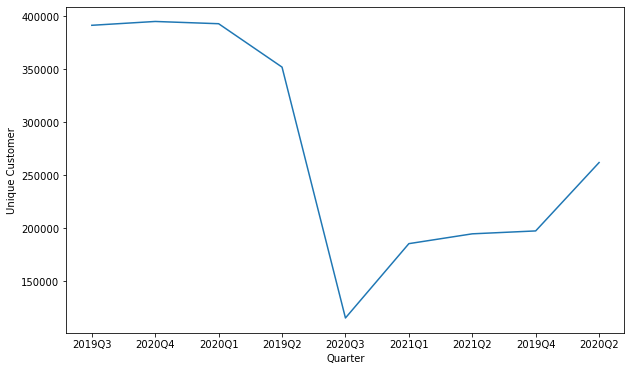

In [158]:
arr = customer['QUARTER'].unique()

plt.figure(figsize=(10,6))
plt.plot(arr, unique_users)
plt.xlabel('Quarter')
plt.ylabel('Unique Customer')
plt.show()

### Customer Retention

Say for company Uber in quarter the [customers] are:
- 2021Q1 [a.c.d.e] NaN
- 2021Q2 [b,d,e,f] len(intersection)/len(previous row) = 2/4
- 2021Q3 [f,g,b]

Retention ratio from the previous quarter

In [160]:
retentions = {}

for merchant in customer['MERCHANT_NAME'].unique():
    print("Working on merchant: ",merchant)
    change = []
    quarters = sorted(customer[customer['MERCHANT_NAME'] == merchant]['QUARTER'].unique())
    change.append(0)
    idx = 1
    while idx < len(quarters):
        print("Working on quarter: ", quarters[idx])
        prev_quarter = list(customer[(customer['MERCHANT_NAME'] == merchant) & (customer['QUARTER'] == quarters[idx-1])]['USER_ID'])
        current_quarter = list(customer[(customer['MERCHANT_NAME'] == merchant) & (customer['QUARTER'] == quarters[idx])]['USER_ID'])
        num_intersections = len(set(prev_quarter).intersection(current_quarter))
        retention_percent = num_intersections / len(prev_quarter)
        change.append(retention_percent)
        idx += 1
    retentions[merchant] = change

Working on merchant:  Uber
Working on quarter:  2019Q3
Working on quarter:  2019Q4
Working on quarter:  2020Q1
Working on quarter:  2020Q2
Working on quarter:  2020Q3
Working on quarter:  2020Q4
Working on quarter:  2021Q1
Working on quarter:  2021Q2
Working on merchant:  Lyft
Working on quarter:  2019Q3
Working on quarter:  2019Q4
Working on quarter:  2020Q1
Working on quarter:  2020Q2
Working on quarter:  2020Q3
Working on quarter:  2020Q4
Working on quarter:  2021Q1
Working on quarter:  2021Q2
Working on merchant:  VIA
Working on quarter:  2019Q3
Working on quarter:  2019Q4
Working on quarter:  2020Q1
Working on quarter:  2020Q2
Working on quarter:  2020Q3
Working on quarter:  2020Q4
Working on quarter:  2021Q1
Working on quarter:  2021Q2
Working on merchant:  Juno
Working on quarter:  2019Q3
Working on quarter:  2019Q4


In [161]:
retentions

{'Uber': [0,
  0.07648434851633579,
  0.07728083916722392,
  0.06927869839326263,
  0.028679671296174748,
  0.12296936689502348,
  0.09800215362623911,
  0.08952421877201386,
  0.1009586830027629],
 'Lyft': [0,
  0.0843397857363586,
  0.08929869343418101,
  0.08629511454173752,
  0.03052955079620778,
  0.11802654034014005,
  0.09559171203064948,
  0.0906945544776454,
  0.10569057421532194],
 'VIA': [0,
  0.06614631325997795,
  0.06526604159432033,
  0.059330819981149856,
  0.014546491728465488,
  0.11627252252252253,
  0.10361200610479905,
  0.09054777950578884,
  0.10028949545078578],
 'Juno': [0, 0.08468318796437306, 0.07392531480677378]}

Cross-app usage

In [162]:
customer.USER_ID.duplicated().sum()

20296205

Using a pivot table to get the number of customers (same USER_ID) in both Uber and Lyft

In [180]:
cross_app = customer.pivot_table(index = ['USER_ID', 'MERCHANT_NAME'], aggfunc ='size')

In [181]:
cross_app.to_csv("Cross App usage.csv")

Using regex to get UberEats from the Description column in Items_data dataset

In [69]:
fields = ['MERCHANT_NAME', 'DESCRIPTION', 'ORDER_TOTAL']

items_data = pd.read_csv("C:\RideShare_Data\items_data.csv", skipinitialspace=True, usecols=fields).dropna()

In [71]:
searchfor = ['UberEATS', 'UberEats']

z = items_data[items_data['DESCRIPTION'].str.contains('|'.join(searchfor))]

In [72]:
z.to_csv("UberEats.csv")

In [73]:
fields = ['MERCHANT_NAME', 'ORDER_DATE']

cancel_data = pd.read_csv("C:\RideShare_Data\cancelations_data.csv", skipinitialspace=True, usecols=fields)

In [74]:
cancel_data['QUARTER'] = cancel_data['ORDER_DATE'].apply(lambda x:get_year_quarter(x))

In [6]:
cancel_data

,MERCHANT_NAME,ORDER_DATE,QUARTER
0,Lyft Cancellation,2020-07-09,2020Q3
1,Uber Cancellation,2020-11-23,2020Q4
2,Uber Cancellation,2019-07-19,2019Q3
3,Uber Cancellation,2020-06-20,2020Q2
4,Uber Cancellation,2019-11-11,2019Q4
...,...,...,...
537346,Uber Cancellation,2019-04-06,2019Q2
537347,Lyft Cancellation,2020-05-31,2020Q2
537348,Uber Cancellation,2021-04-19,2021Q2
537349,Uber Cancellation,2019-09-30,2019Q3


In [75]:
cancel_data['MERCHANT_NAME'] = cancel_data['MERCHANT_NAME'].str.split(' ').str[0]

In [76]:
cancel_data['MERCHANT_NAME'].value_counts()

Uber    365904
Lyft    171447
Name: MERCHANT_NAME, dtype: int64

In [77]:
cancel_data['QUARTER'].value_counts()

2019Q4    94338
2019Q2    89925
2019Q3    86391
2020Q1    70246
2021Q2    59719
2021Q1    40973
2020Q3    37741
2020Q4    36400
2020Q2    21618
Name: QUARTER, dtype: int64

In [80]:
a = cancel_data.groupby(['MERCHANT_NAME', 'QUARTER']).count()